In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('billboard.csv')

In [3]:
df.head()

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33


In [4]:
df.shape

(327895, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              327895 non-null  int64  
 1   url                     327895 non-null  object 
 2   week_id                 327895 non-null  object 
 3   week_position           327895 non-null  int64  
 4   song                    327895 non-null  object 
 5   performer               327895 non-null  object 
 6   song_id                 327895 non-null  object 
 7   instance                327895 non-null  int64  
 8   previous_week_position  295941 non-null  float64
 9   peak_position           327895 non-null  int64  
 10  weeks_on_chart          327895 non-null  int64  
 11  year                    327895 non-null  int64  
 12  week                    327895 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 32.5+ MB


#### Give your table a short caption describing what is shown in the table.

In [6]:
df.groupby(['song','performer'])['weeks_on_chart'].max().sort_values(ascending=False).head(10).reset_index()

,song,performer,weeks_on_chart
0,Radioactive,Imagine Dragons,87
1,Sail,AWOLNATION,79
2,Blinding Lights,The Weeknd,76
3,I'm Yours,Jason Mraz,76
4,How Do I Live,LeAnn Rimes,69
5,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
6,Counting Stars,OneRepublic,68
7,Rolling In The Deep,Adele,65
8,Foolish Games/You Were Meant For Me,Jewel,65
9,Before He Cheats,Carrie Underwood,64


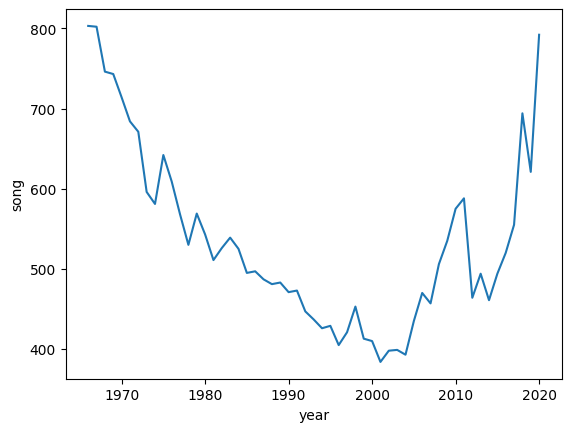

In [7]:
df_b=df[df['year']>1965] 
df_b=df_b[df_b['year']<2021]
new_df_b=df_b.groupby('year')['song'].nunique().reset_index()
b=sns.lineplot(x='year',y='song',data=new_df_b)

Part C: Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

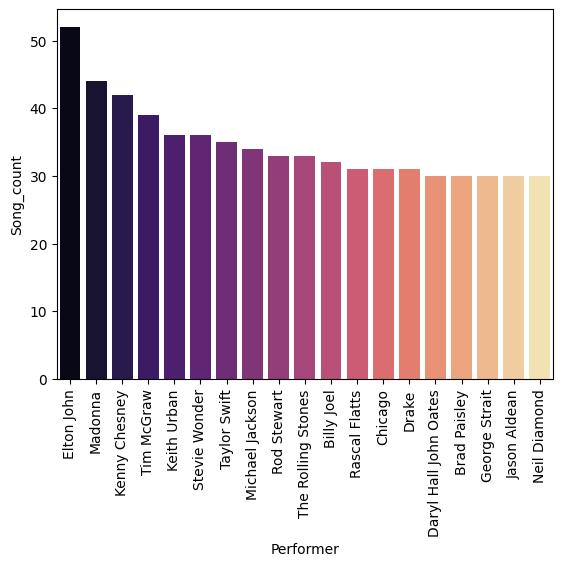

In [8]:
df_c=df[df['weeks_on_chart']>9]
df_c=df_c[df_c['year']>1957]
df_c.drop_duplicates(subset=['song','performer'],inplace=True)
new_df_c=df_c['performer'].value_counts().head(19).reset_index()
new_df_c.columns=['Performer','Song_count']
b=sns.barplot(x='Performer',y='Song_count',data=new_df_c,palette='magma')
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()

### ------------------------------------------------------------------------------------------------------------------------------------